In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load dataset
df = pd.read_csv("C:\\resume\\churn\\customer_churn_350.csv")  # replace with your dataset path


In [4]:
# Quick look
print(df.head())
print(df.info())

   CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0           1  Female              1      No        Yes      50           No   
1           2    Male              1      No        Yes      58          Yes   
2           3    Male              1      No        Yes       1           No   
3           4    Male              1     Yes         No      72          Yes   
4           5  Female              1      No         No      33           No   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No              No             No  ...               No   
1           Yes             DSL             No  ...              Yes   
2            No              No             No  ...               No   
3           Yes             DSL             No  ...               No   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0       

In [5]:

# Example preprocessing (adjust as needed)
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [6]:
# Convert categorical features
df = pd.get_dummies(df, drop_first=True)

In [7]:
# Split features/labels
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [11]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [12]:
# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Classification Report (RF):")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.5857142857142857
Random Forest Accuracy: 0.5285714285714286
Classification Report (RF):
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        37
           1       0.50      0.27      0.35        33

    accuracy                           0.53        70
   macro avg       0.52      0.51      0.49        70
weighted avg       0.52      0.53      0.50        70



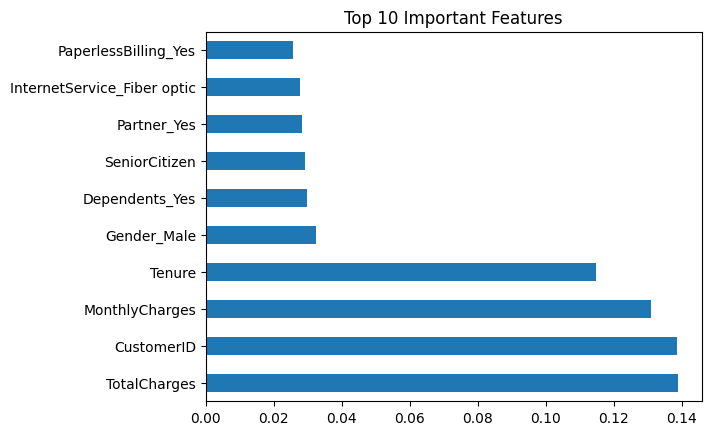

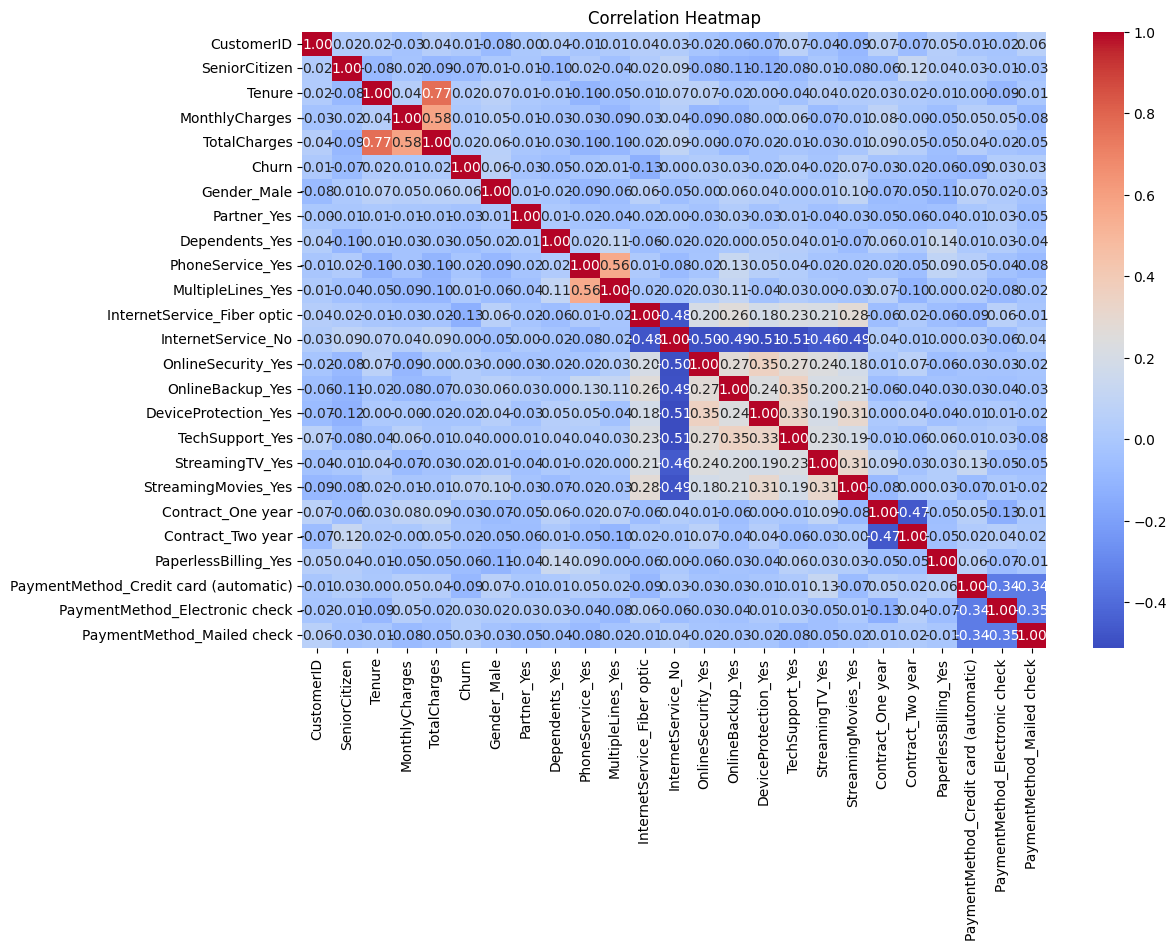

In [13]:
# Feature importance from Random Forest
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
